### **PROJECT**:
 - ## **Genaral Convos with Funny / Meme Responses**


  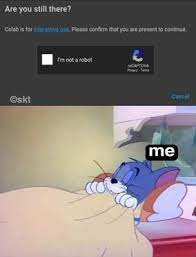

#### **Business Goal**:
  -  The Goal of this project is to create a chatbot that talks to users casually and replies with funny or meme based response to make Conversations enjoyable and entertraining.

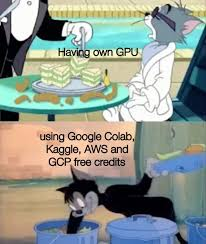

### **Data-Collection:**
 - Collected Data some information from **Kaggle** and some other from Social Media like **Instagram**

 - The dataset has two columns :  **Question and Answer.**
 - Created a Folder named **images** where each meme response has related image.

### **Loading the Dataset:**
 - Using pandas we are loading the dataset.

In [ ]:
import pandas as pd
meme_data = pd.read_csv('/content/drive/MyDrive/jokes.csv', encoding='ISO-8859-1')
meme_data.sample(10)

,ID,Question,Answer
33916,33917.0,What's the difference between beekeeping and f...,Falconers have to be more talon-ted
7421,7422.0,What did the motivational speaker say to the d...,You conduit!
15756,15757.0,How do you start a baby shower?,Throw it into a wood chipper.
10425,10426.0,"If Caitlyn Jenner were a super hero, what team...",The Ex-Men.
35245,35246.0,What did Sandy say when she came to New York?,I come to this great city with great intentions.
14715,14716.0,What did the girl on her period say when she g...,"""You caught me red handed!"""
2302,2303.0,What do you call a sleep walking nun?,A roamin' Catholic.
7026,7027.0,What is the capital of Greece?,More than the capital of the UK.
7825,7826.0,Why do snakes have no balls?,Cause they would look like dicks.
3853,3854.0,What did the grape say when the elephant stepp...,Not much. It just gave a little whine.


# 2. Validation (Checking for Duplicates & Missing Values)

 - Clean the dataset to remove duplicates and missing values.

 - Use pandas to check for duplicates and missing values.
 - Removing unwanted columns.

- **There is no use of id column hence we are dropping id column.**

In [ ]:
meme_data = meme_data.drop('ID' , axis=1)

In [ ]:
print("\nData types of columns:")
print(meme_data.dtypes)
print("\nShape of the dataset:")
print(meme_data.shape)
print("\nMissing values:")
print(meme_data.isnull().sum())


Data types of columns:
Question    object
Answer      object
dtype: object

Shape of the dataset:
(38511, 2)

Missing values:
Question    0
Answer      3
dtype: int64


 - **Here we have 3 null values in answer column , we have heavy dataset dropping 3 null values nothing will happen hence dropping 3 null values.**

In [ ]:
meme_data = meme_data.dropna()

# 3. Word Clouds
Visualize the most frequent words in our meme dataset.

 - Use the wordcloud library to generate word clouds.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

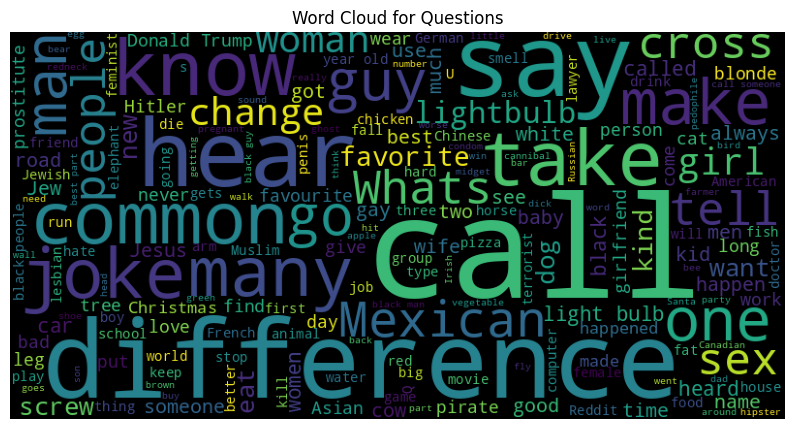

In [ ]:
# Word cloud for questions
question_text = ' '.join(meme_data['Question'])
wordcloud = WordCloud(width=800, height=400, background_color ='black').generate(question_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

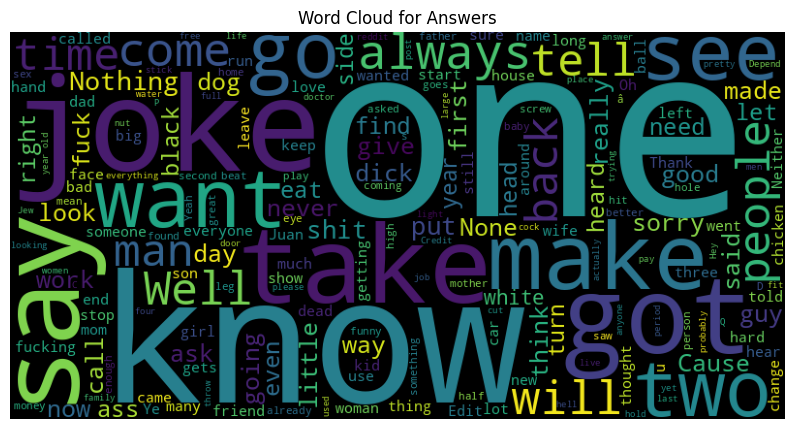

In [ ]:
# Word cloud for answers
answer_text = ' '.join(meme_data['Answer'])
wordcloud = WordCloud(width=800, height=400, background_color ='black').generate(answer_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()

 - Here our meme dataset related to **sequence to sequence** chatbot generation hence we are following seq2seq workflow.


### **1. Text Cleaning**

In [ ]:
# required libraries
import nltk
from nltk.tokenize import word_tokenize
import re
import unicodedata

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = unicode_to_ascii(text.lower().strip())
    text = re.sub("(\\W)"," ",text)
    text = re.sub('\S*\d\S*\s*','', text)
    text =  "<sos> " +  text + "<eos>"
    return text

# Apply preprocessing to question and answer columns
clean_data = meme_data.copy()
clean_data['Question'] = clean_data['Question'].apply(preprocess_text)
clean_data['Answer'] = clean_data['Answer'].apply(preprocess_text)

# Print the preprocessed DataFrame
clean_data

,Question,Answer
0,<sos> did you hear about the native american m...,<sos> he nearly drown in his own tea pee <eos>
1,<sos> what s the best anti diarrheal prescript...,<sos> mycheexarphlexin<eos>
2,<sos> what do you call a person who is outside...,<sos> matt<eos>
3,<sos> which star trek character is a member of...,<sos> jean luc pickacard<eos>
4,<sos> what s the difference between a bullet a...,<sos> a bullet doesn t miss harambe<eos>
...,...,...
38506,<sos> what s the biggest problem in life <eos>,<sos> life lo biggest problem ante gb ki app...
38507,<sos> what s your favorite hobby <eos>,<sos> biryani picture teesukoni whatsapp lo sh...
38508,<sos> what s a classic dad joke <eos>,<sos> why don t eggs tell jokes they might cr...
38509,<sos> why is love blind <eos>,<sos> because it trusts vibes not eyesight ...


### **Converting Words to Numbers**

- 1. Converting clean data into list.

In [ ]:
# Preprocessing the data
questions =clean_data['Question'].values.tolist()
answers = clean_data['Answer'].values.tolist()

 2. converting words into numbers using Tokenization.

**Tokenization:**
    
  Tokenization is process of breaking sentences or paragraphs into smaller words is called **Tokens**
      

  - Assigns a unique number to every word in the dataset.
  -Example: "hello" → 1, "how" → 2.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenizing the data
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(np.concatenate((questions, answers), axis=0))

vocab_size = len(tokenizer.word_index) + 1
print('vocabulary size',vocab_size)

vocabulary size 31425


**Vocabulary size is important whenever we are building a embedding layer.**

- it says how many number of unique words are there.

**here converting texts into Sequences becoz we are working on sequence to sequence data**

In [ ]:
# Convert text to sequences
question_seqs = tokenizer.texts_to_sequences(questions)
answer_seqs = tokenizer.texts_to_sequences(answers)

### **sentences length**

In [ ]:
max_len_question = max(len(seq) for seq in question_seqs)
max_len_answer = max(len(seq) for seq in answer_seqs)
max_len = max(max_len_question, max_len_answer)
print(max(max_len_question, max_len_answer))

109


### **Padding**

 - padding is the process of adding dummy values (usually zeros) to make all sequences **same length**

 - in these we have 2types:

     1.Pre padding

     2.post padding

    I am using post padding means adding dummy values at the end of sentence.

In [ ]:
question_seqs = pad_sequences(question_seqs, maxlen=max_len, padding='post')
answer_seqs = pad_sequences(answer_seqs, maxlen=max_len, padding='post')

In [ ]:
tokenizer.texts_to_sequences("<sos>")

[[], [8], [460], [8], []]

In [ ]:
tokenizer.word_index["<sos>"]

1

### Model Building:

## **Encoder - Decoder Model with Attention and LSTMs Memebot**

### **Encode-Decoder:**

In this we have mainly two componets:
 - Encoder - reads source sequence and produce its representation.
 - Decoder - Uses source representation from the encoder to develop a target sequence.


 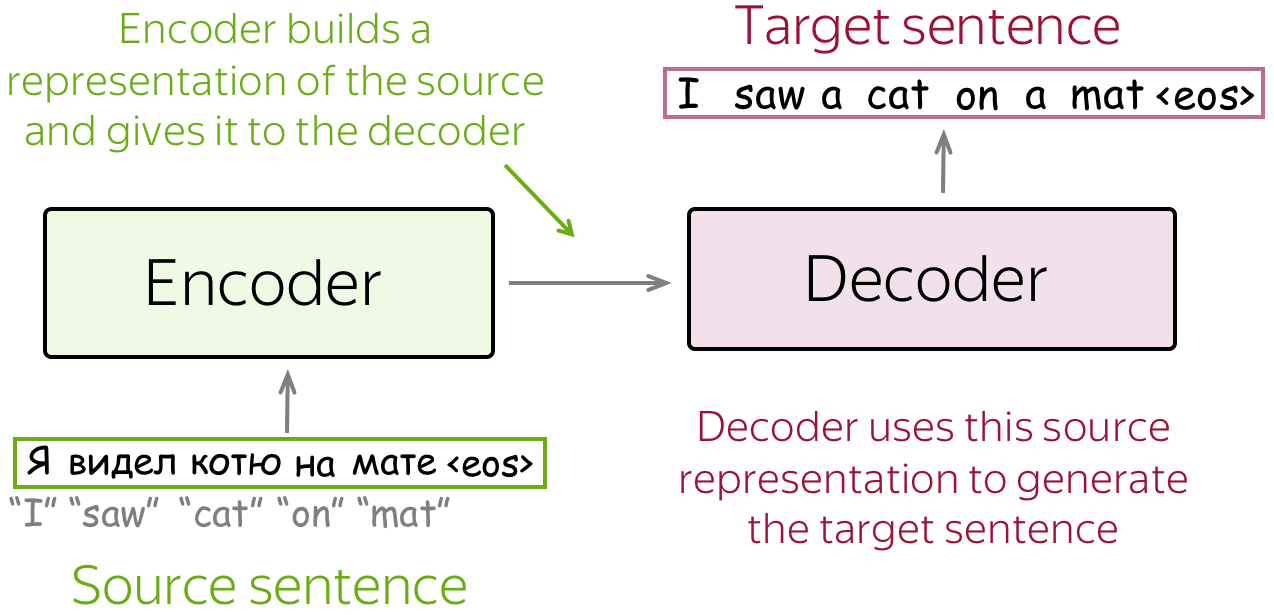

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Attention, Concatenate, Dropout

In [ ]:
latent_dim = 256  # output for embedding layer and dimensionality for encoding

**Encoder**

In [ ]:
# Encoder
encoder_inputs = Input(shape=(max_len,))
encoder_embedding = Embedding(vocab_size, latent_dim, input_shape=(max_len,))
encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding(encoder_inputs))
encoder_states = [state_h, state_c]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Decoder**

In [ ]:
# Decoder
decoder_inputs = Input(shape=(max_len-1,))
decoder_embedding = Embedding(vocab_size, latent_dim, input_shape=(max_len-1,))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.1, recurrent_dropout=0.1)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding(decoder_inputs), initial_state=encoder_states)

 - The encoder compressed the whole source sentence into a single vector.
 - When the encoder is forced to pull all information into a single vector , it is likely to forget something.

 - 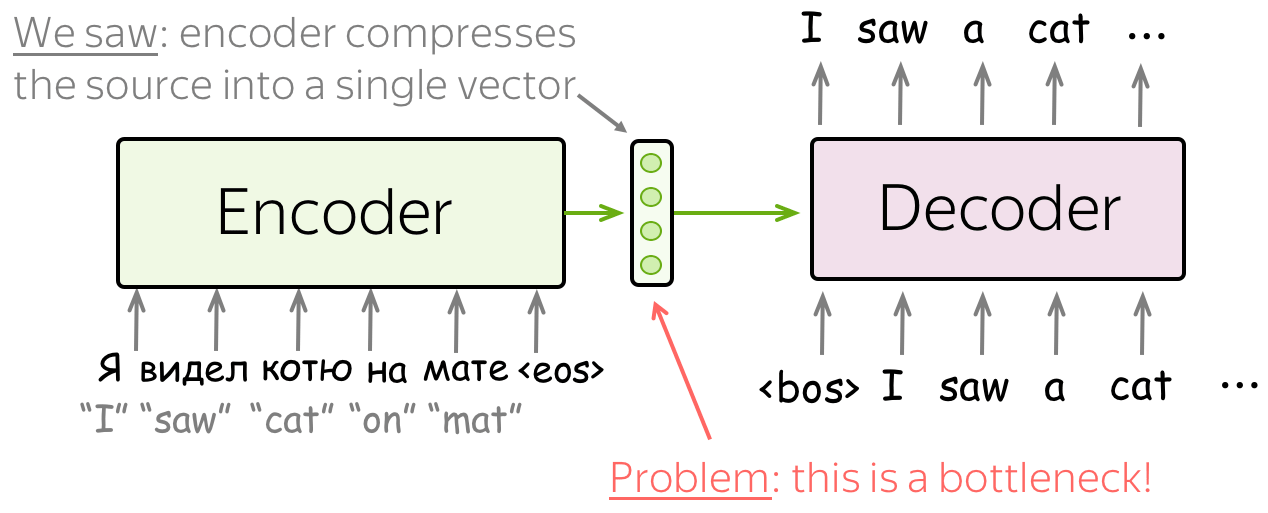

 - Not only it is hard for the encoder to pull all information into a single vector - this is also hard for the decoder.

**Hence to overcome these probelem we are using Attention Mechanism**

### **Attention Mechanism**

 - At each decoder step , it decides which source parts are more important.
 - The encoder does not have to compress the whole source into a single vector - it gives representations for all source tokens

In [ ]:
# Attention mechanism
attention_layer = Attention()
attention_output = attention_layer([decoder_outputs, encoder_outputs])

In [ ]:
# Concatenate attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention_output])

In [ ]:
# Add dropout layer for regularization
decoder_concat_input = Dropout(0.1)(decoder_concat_input)

In [ ]:
# output layer
# dense layer Outputs a probability for each word in the vocabulary.

decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

**Model defining**

In [ ]:
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs,name = 'Memebot')

**Compiling model**

 - used:
 -optimizer - adam
 -loss - sparse categorical crossentropy
 - metrics - accuracy

In [ ]:
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "Memebot"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 109)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 108)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 109, 256)       │      8,044,800 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 108, 256)       │      8,044,800 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 109, 256),     │        525,312 │ embedding[0][0]        │
│                           │ (None, 256), (None,    │                │                        │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 108, 256),     │        525,312 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 108, 256)       │              0 │ lstm_1[0][0],          │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 108, 512)       │              0 │ lstm_1[0][0],          │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 108, 512)       │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 108, 31425)     │     16,121,025 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,261,249 (126.88 MB)

 Trainable params: 33,261,249 (126.88 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

In [ ]:
history = model.fit([question_seqs, answer_seqs[:, :-1]], answer_seqs[:, 1:],
          batch_size = 128,
          epochs=10,
          validation_split = 0.2
          )

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.9351 - loss: 0.4863 - val_accuracy: 0.9305 - val_loss: 0.5157
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9387 - loss: 0.4478 - val_accuracy: 0.9328 - val_loss: 0.4961
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9412 - loss: 0.4210 - val_accuracy: 0.9353 - val_loss: 0.4743
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.9429 - loss: 0.4034 - val_accuracy: 0.9369 - val_loss: 0.4606
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9456 - loss: 0.3817 - val_accuracy: 0.9378 - val_loss: 0.4516
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9462 - loss: 0.3674 - val_accuracy: 0.9386 - val_loss: 0.4434
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9480 - loss: 0.3470 - val_accuracy: 0.9392 - val_loss: 0.4375
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9484 - loss: 0.3350 - val_accu

In [ ]:
model.save('Memebot.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Memebot.h5')

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def generate_response(input_text):
    # Tokenize and pad input sequence
    input_sequence = pad_sequences(tokenizer.texts_to_sequences([input_text]), maxlen=max_len, padding='post')

    # Initialize decoder input with <sos>
    decoder_input = np.zeros((1, max_len - 1), dtype=np.int32)
    decoder_input[0, 0] = tokenizer.word_index['<sos>']

    for i in range(1, max_len - 1):
        # Predict next word without redundant dimensions
        predictions = model.predict([input_sequence, decoder_input],verbose=0)
        next_word_id = np.argmax(predictions[0, i - 1, :])

        # Stop if <eos> token is generated
        if next_word_id == tokenizer.word_index['<eos>']:
            break

        decoder_input[0, i] = next_word_id

    # Convert token IDs to words
    output_text = " ".join([tokenizer.index_word[idx] for idx in decoder_input[0] if idx > 0 and idx != tokenizer.word_index['<eos>']])
    return output_text.strip()

# Test the function
response = generate_response("can we go")
print("😂:", response)


😂: <sos> it s a good and the other is a good


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def chat():
    print("🤖: Hi! Ask me anything, and I'll respond with a meme.")
    while True:
        user_input = input("🗣️: ")
        if user_input.lower() in ["exit", "quit", "bye"]:
            print("😂: Goodbye! Have a great day!")
            break
        response = generate_response(user_input)
        print(f"😂: {response}")
# Start the chat
chat()

🤖: Hi! Ask me anything, and I'll respond with a meme.
🗣️: can you love me
😂: <sos> you re a little boogie in the back
🗣️: can you motivate me
😂: <sos> you re a little boogie in the back
🗣️: hello
😂: <sos> it s a good and the other is a little lighter
🗣️: how are you
😂: <sos> they re both a little boogie in the same
🗣️: weather today
😂: <sos> it s a good and the other is a little lighter
🗣️: outside
😂: <sos> the guy is a little plus
🗣️: exam ki help cheasthava
😂: <sos> it s a good and the other is a good
🗣️: what is the biggest problem
😂: <sos> the captains line
🗣️: how to solve problems
😂: <sos> a man walks into a hole
🗣️: have you breakfast
😂: <sos> i m not sure but i m not sure i m not sorry
🗣️: i love you
😂: <sos> i m not sure but i m not sure i m not sorry
🗣️: can you sing a song
😂: <sos> you re a little boogie in the back
🗣️: bye
😂: Goodbye! Have a great day!
